In [2]:
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [170]:
def cover(tide):
    """Returns a matplotlib.pyplot Figure object, ready to write to PDF.
    """
    
    R = 2         # main circle radius
    a = 0.1       # sine amplitude
    n = 8         # number of bumps

    theta = np.linspace(0, 2 * np.pi, 500)

    x = (R + a * np.sin(n * theta)) * np.cos(theta)
    y = (R + a * np.sin(n * theta)) * np.sin(theta)

    entire_lunar_cycle = '0ABCDEFGHIJKLM@NOPQRSTUVWXYZ'  # the dark part
    moon_icon = 'TUWX0CDFGHJK@PQS'   # subset of moon icons, ready to plot radially
    moontheta = np.linspace(0, 2 * np.pi, 17)[:-1]
    o = 0.3      # offset for moon icons to account for right alignment

    fig = plt.figure(figsize=(8.5,11))
    ax = plt.subplot(111)
    for frac in np.linspace(0, 1, 20):
        ax.plot(frac * x, frac * y, '-', c = '#52ABB7', lw = 5, alpha = 0.5)
    #ax.plot(4 * cos(theta), 4 * sin(theta), '--', c = 'red')  # moon placement check
    for daynum in range(16):
        th = moontheta[daynum]
        mx = 2 * R * np.cos(th) + o
        my = 2 * R * np.sin(th) - o
        # the dark part
        ax.text(mx, my, moon_icon[daynum], ha = 'right', fontsize = 12,
                color = '0.75', fontname = 'moon phases')
        # the white part
        ax.text(mx, my, '*', ha = 'right', fontsize = 12, 
                color = '#D7A8A8', alpha = 0.25, fontname = 'moon phases')
    # the sun
    ax.scatter(0, 14, s=100000, marker = (128, 1, 0),
                           facecolor = '#FFEB00', linewidth = 0.05,
                           edgecolor = '#FFEB00')

    ax.axis([-R * 5, R * 5, -R * 5, R * 5])
    ax.axis('off')
    
    fig.subplots_adjust(left = 1.75/8.5, right = 1 - (1.75/8.5),
                        bottom = 3.5/11, top = 8.5/11)

    fig.text(0.5, 0.8, 'Sun * Moon * Tide', horizontalalignment = 'center',
             fontsize = '68', fontname = 'FoglihtenNo01')
    fig.text(0.5, 0.32, '{}'.format(tide.year), 
             horizontalalignment = 'center', fontsize = '96',
             fontname = 'FoglihtenNo01')
    fig.text(0.5, 0.25, 'Calendar',
             horizontalalignment = 'center', fontsize = '48',
             fontname = 'FoglihtenNo01')
    fig.text(0.5, 0.15, '{}, {}'.format(tide.station_name, tide.state),
             horizontalalignment = 'center', fontsize = '24',
             fontname = 'Foglihten')
    return fig


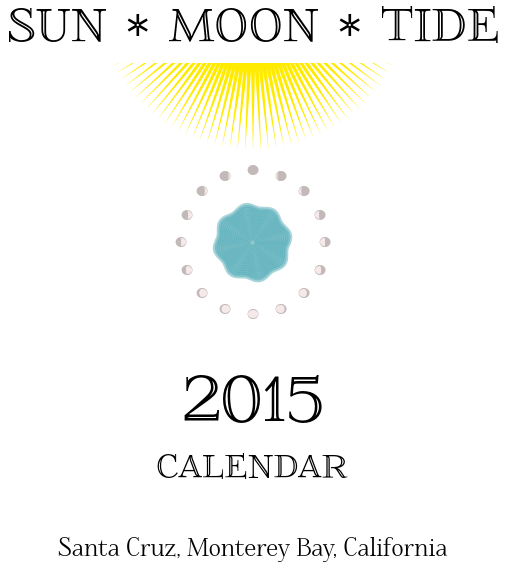

In [171]:
from tides import Tides
mytide = Tides('example_noaa_file.TXT')
fig = cover(mytide)
fig.savefig('test.pdf')
plt.show()
